In [22]:
import numpy as np
import skimage as sk
import skimage.io as skio
import json
import copy
import triangle
import matplotlib.pyplot as plt
import skimage as ski
from PIL import Image
import imageio
import os
from tqdm import tqdm
import cv2
import skimage.transform as sktransform

In [53]:
# Load the CSV file using numpy.genfromtxt
csv_name = 'example.csv'
data = np.genfromtxt(csv_name, delimiter=',')

def truncate_values(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if array[i][j] > 255:
                array[i][j] = 255
    return array
data = truncate_values(data)

print(data)
skio.imsave('depth.png', data/255)
# Display the data
print(data.shape)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[[255.         255.         255.         ... 255.         255.
  255.        ]
 [255.         255.         255.         ... 255.         255.
  255.        ]
 [255.         255.         255.         ... 255.         255.
  255.        ]
 ...
 [  2.34135056   2.3413167    2.34128284 ...   2.34145284   2.34141874
    2.34138465]
 [  2.34081173   2.34079146   2.3407712  ...   2.34087324   2.34085274
    2.34083223]
 [  2.34062576   2.34061909   2.34061217 ...   2.34064627   2.34063935
    2.34063268]]
(256, 512)


In [45]:
def resize_img(image, shape):
    new_height = shape[0]
    new_width = shape[1]
    resized_image = sktransform.resize(image, (new_height, new_width), anti_aliasing=True)
    skio.imsave('resized.jpg', resized_image)
    return resized_image

In [48]:
pic_name = "example.png"
im = skio.imread(pic_name)
im = im[:,:,:3]
# im = sk.img_as_float(im)
im = resize_img(im, data.shape)                 
# im = sk.img_as_float(im)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [30]:
im.shape

(256, 512, 4)

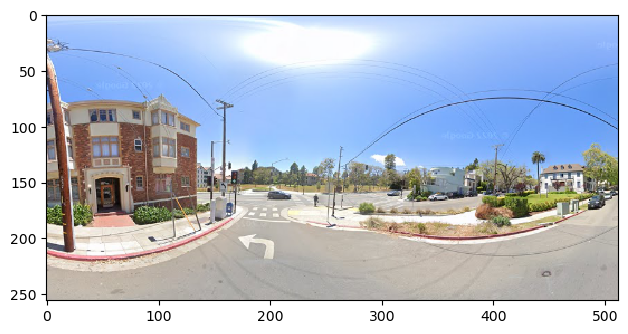

In [31]:
skio.imshow(im)

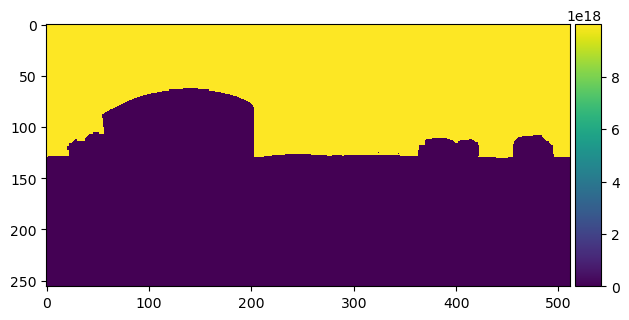

In [28]:
skio.imshow(data)

In [52]:
pic_name = "depth.png"
im = skio.imread(pic_name)
print(im)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


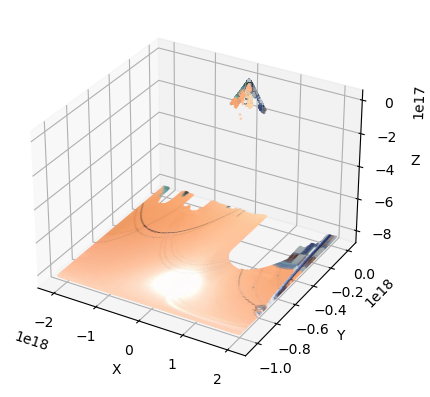

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the panorama and depth map images
panorama = cv2.imread('resized.png')
depth_map = cv2.imread('depth.png', cv2.IMREAD_GRAYSCALE)


# csv_name = 'example.csv'
# data = np.genfromtxt(csv_name, delimiter=',')

# depth_map = cv2.imread('depth.png', cv2.IMREAD_GRAYSCALE)

# Assuming depth values are in the range of [0, 255], normalize to the range [0, 1]
normalized_depth = depth_map / 255.0

# Define parameters for creating the point cloud
focal_length = 100  # Focal length of the camera
fov = 360  # Field of view in degrees

# Calculate the 3D coordinates for each pixel using depth information
height, width = depth_map.shape
x, y = np.meshgrid(np.arange(width), np.arange(height))
x = x - width / 2
y = height / 2 - y
distance = normalized_depth * focal_length / np.tan(np.radians(fov / 2))
X = distance * x / focal_length
Y = distance * y / focal_length
Z = distance

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(X, Y, Z, c=panorama.reshape(-1, 3) / 255.0, s=1)

# Set labels and display
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()